In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
from scipy import stats
import sys
sys.path.append('..')
from madule import simulation
from madule import plots
from statsmodels.stats.anova import AnovaRM

In [37]:
"""Pooling data"""

# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-045',
           'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 'sub-060',
           'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 'sub-074',
           'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081',
           'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 'sub-090',
           'sub-092', 'sub-108', 'sub-109']
# Group level
randomGroupLabel = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/randomGroupLabel.csv')
# concatenating data
dataAll = pd.DataFrame([])
for subName in subList:
    # List of existing .csv files for each session and run realted to the subject
    files = ['/ses-02achieva7t/' + subName + '_ses-02achieva7t_task-DA_run-1_beh.csv',
             '/ses-02achieva7t/' + subName + '_ses-02achieva7t_task-DA_run-2_beh.csv',
             '/ses-03achieva7t/' + subName + '_ses-03achieva7t_task-DA_run-1_beh.csv',
             '/ses-03achieva7t/' + subName + '_ses-03achieva7t_task-DA_run-2_beh.csv']

    # Main directory of the subject
    subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
    
    # Making empty Dataframe to be concatenated in all four .csv file of the subject
    data = pd.DataFrame([])
    for i in range(len(files)):
        dirc = subMainDirec + subName + files[i]
        df = pd.read_csv(dirc)
        
        data = pd.concat([data, df])
    # set the name of participants to each data
    data['sub_ID'] = subName
    # read and then set the number of group
    labelSes1 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-02'])
    labelSes2 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-03'])
    data.loc[data['session'] == 1, 'group'] = str(labelSes1)
    data.loc[data['session'] == 2, 'group'] = str(labelSes2)
    # Detection of irregular responces (no-responses or error responces)
    temp = data['pushed'].to_numpy().astype(int)
    dataClear = data[temp>=0]
    #save file name
    saveFile = subMainDirec + subName + '/' + subName + '_behData'
    # Concatenating each data
    dataAll = pd.concat([dataAll, dataClear])

In [ ]:
           
        if df[0:1]['stimActFirst'][0]=='Act':
            df = df.loc[((df['session']==1) & (df['run']==1) & (df['block']=='Stim'))|
                        ((df['session']==1) & (df['run']==2) & (df['block']=='Act'))|
                        ((df['session']==2) & (df['run']==1) & (df['block']=='Stim'))|
                        ((df['session']==2) & (df['run']==1) & (df['block']=='Act'))]
        elif df[0:1]['stimActFirst'][0]=='Stim':
            df = df.loc[((df['session']==1) & (df['run']==1) & (df['block']=='Stim'))|
                        ((df['session']==1) & (df['run']==1) & (df['block']=='Act'))|
                        ((df['session']==2) & (df['run']==1) & (df['block']=='Stim'))|
                        ((df['session']==2) & (df['run']==2) & (df['block']=='Act'))]


            
        

In [39]:
dataAll.loc[dataAll['sub_ID']=='sub-004']

,session,run,stimActFirst,block,stimActBlock,trialNumber,stimOnset,yellowOnLeftSide,leftCanBePushed,winAmtLeft,...,decFBjitOnset,FBOnset,yellowCorrect,pushCorrect,correctChoice,wonAmount,totalAmount,ITIOnset,sub_ID,group
1,1,1,Act,Act,1,3,12.808,1,1,6,...,15.754,22.754,1,1,1.0,6,6,23.958,sub-004,1
4,1,1,Act,Act,1,6,49.864,0,1,71,...,53.131,57.062,1,0,1.0,29,35,58.264,sub-004,1
5,1,1,Act,Act,1,7,61.545,0,1,15,...,64.721,68.362,1,0,1.0,85,120,69.567,sub-004,1
6,1,1,Act,Act,1,8,73.445,1,0,68,...,76.722,81.679,0,1,0.0,0,120,82.887,sub-004,1
8,1,1,Act,Act,1,10,99.551,1,0,22,...,102.317,108.004,0,1,1.0,78,198,109.211,sub-004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2,2,Stim,Stim,2,79,946.917,1,0,45,...,949.194,954.152,0,1,0.0,0,1989,955.355,sub-004,3
79,2,2,Stim,Stim,2,81,972.367,0,1,47,...,975.095,976.979,1,0,0.0,0,1989,978.183,sub-004,3
81,2,2,Stim,Stim,2,83,988.418,0,0,79,...,991.079,996.774,1,1,0.0,0,1989,997.977,sub-004,3
82,2,2,Stim,Stim,2,84,1003.318,1,1,98,...,1005.983,1010.647,0,0,0.0,0,1989,1011.852,sub-004,3


In [21]:
df = dataAll.loc[dataAll['sub_ID']=='sub-004']

In [29]:
df.loc[((df['session']==1) & (df['run']==2) & (df['block']=='Act'))]['correctChoice'].mean()

0.5121951219512195

In [14]:
dataAll.groupby(['sub_ID'])['correctChoice', 'RT'].mean()

/tmp/ipykernel_148992/1684119866.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAll.groupby(['sub_ID', 'session'])['correctChoice', 'RT'].mean()


correctChoice        RT
sub_ID  session                         
sub-004 1             0.506173  1.417309
        2             0.493506  1.529883
sub-012 1             0.536585  1.544329
        2             0.493671  1.529241
sub-025 1             0.454545  1.511974
...                        ...       ...
sub-092 2             0.525641  1.915462
sub-108 1             0.538462  1.599564
        2             0.410959  1.432288
sub-109 1             0.592105  1.164592
        2             0.525000  1.263588

[88 rows x 2 columns]

In [59]:
"""Split up the data into conidtion-dependent data and then define new column for the maximum winning value
Calculate maximum across Color and Action winning Values seperately"""
dataAll['chosenWinAmt'] = (dataAll['leftChosen']*dataAll['winAmtLeft'] + (1-dataAll['leftChosen'])*(dataAll['winAmtRight'])).astype(int)
# Save concatenated data over all particiapnts plus the new column 
dataAll.to_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv', index=False)

In [60]:
"""Choice Proportion and RT in Group 2"""

# Save concatenated data over group lable 2
dataAllGroup2 = dataAll.loc[dataAll['group']=='2']
dataAllGroup2.to_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/dataAllGroup2.csv', index=False)

In [61]:
# Repeated mesure ANOVA in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup2, depvar='correctChoice', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,0.9703,1.0000,22.0000,0.3353
block,0.5111,1.0000,22.0000,0.4822
session:block,0.4090,1.0000,22.0000,0.5291


In [62]:
# Repeated mesure ANOVA in responce time
aovrm2way = AnovaRM(data = dataAllGroup2, depvar='RT', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,6.3961,1.0000,22.0000,0.0191
block,0.2349,1.0000,22.0000,0.6327
session:block,0.1212,1.0000,22.0000,0.7310


In [63]:
"""Choice Proportion and RT in Groups 1 and 3"""
dataAllGroup13 = dataAll.loc[(dataAll['group']=='1') | (dataAll['group']=='3')]
dataAllGroup13.to_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/dataAllGroup13.csv', index=False)

In [64]:
# Repeated mesure ANOVA across session in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='correctChoice', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,1.3674,1.0000,20.0000,0.2560
block,3.2493,1.0000,20.0000,0.0865
session:block,0.0684,1.0000,20.0000,0.7963


In [65]:
# Repeated mesure ANOVA across session in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='correctChoice', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,1.3674,1.0000,20.0000,0.2560
block,3.2493,1.0000,20.0000,0.0865
session:block,0.0684,1.0000,20.0000,0.7963


In [66]:
# Repeated mesure ANOVA across session in response time
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='RT', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,23.6925,1.0000,20.0000,0.0001
block,0.3493,1.0000,20.0000,0.5611
session:block,2.5279,1.0000,20.0000,0.1275


In [67]:
# Repeated mesure ANOVA across group in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='correctChoice', subject = 'sub_ID',
                    within=['group','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
group,2.6827,1.0000,20.0000,0.1171
block,3.2493,1.0000,20.0000,0.0865
group:block,1.5619,1.0000,20.0000,0.2258


In [68]:
# Repeated mesure ANOVA across group in response time
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='RT', subject = 'sub_ID',
                    within=['group','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
group,0.0052,1.0000,20.0000,0.9430
block,0.3493,1.0000,20.0000,0.5611
group:block,4.7595,1.0000,20.0000,0.0412


In [69]:
dataAllGroup2.groupby(['session', 'block'], as_index=False)['correctChoice', 'RT'].mean()

/tmp/ipykernel_3280225/881196541.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllGroup2.groupby(['session', 'block'], as_index=False)['correctChoice', 'RT'].mean()


,session,block,correctChoice,RT
0,1,Act,0.497758,1.549385
1,1,Stim,0.494910,1.539982
2,2,Act,0.483711,1.458119
3,2,Stim,0.497548,1.433158


In [70]:
dataAllGroup13.groupby(['group', 'block'], as_index=False)['correctChoice', 'RT'].mean()

/tmp/ipykernel_3280225/2454123967.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllGroup13.groupby(['group', 'block'], as_index=False)['correctChoice', 'RT'].mean()


,group,block,correctChoice,RT
0,1,Act,0.501200,1.564469
1,1,Stim,0.502130,1.505003
2,3,Act,0.495152,1.522167
3,3,Stim,0.475529,1.545862


In [71]:
""" Scatter plots for proportion of correct choice and RT in each group"""
dataAllMean = dataAll.groupby(['sub_ID', 'group'], as_index=False)['correctChoice', 'RT'].mean()

/tmp/ipykernel_3280225/2881906800.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllMean = dataAll.groupby(['sub_ID', 'group'], as_index=False)['correctChoice', 'RT'].mean()


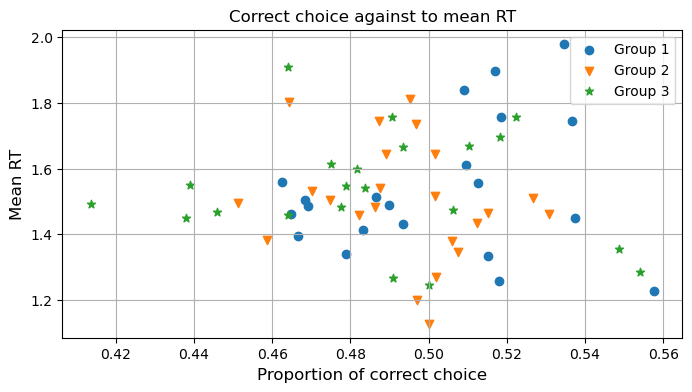

In [72]:
plt.figure(figsize=(8, 4))
markers = ['o', 'v', '*']
groups = ['1', '2', '3']
for g, m in zip(groups, markers):
    plt.scatter(dataAllMean.loc[dataAllMean['group']==g]['correctChoice'], 
                dataAllMean.loc[dataAllMean['group']==g]['RT'], marker=m)
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.xlabel('Proportion of correct choice', size=12)
plt.ylabel('Mean RT', size=12)
plt.title('Correct choice against to mean RT', size=12)
plt.grid()
plt.show()

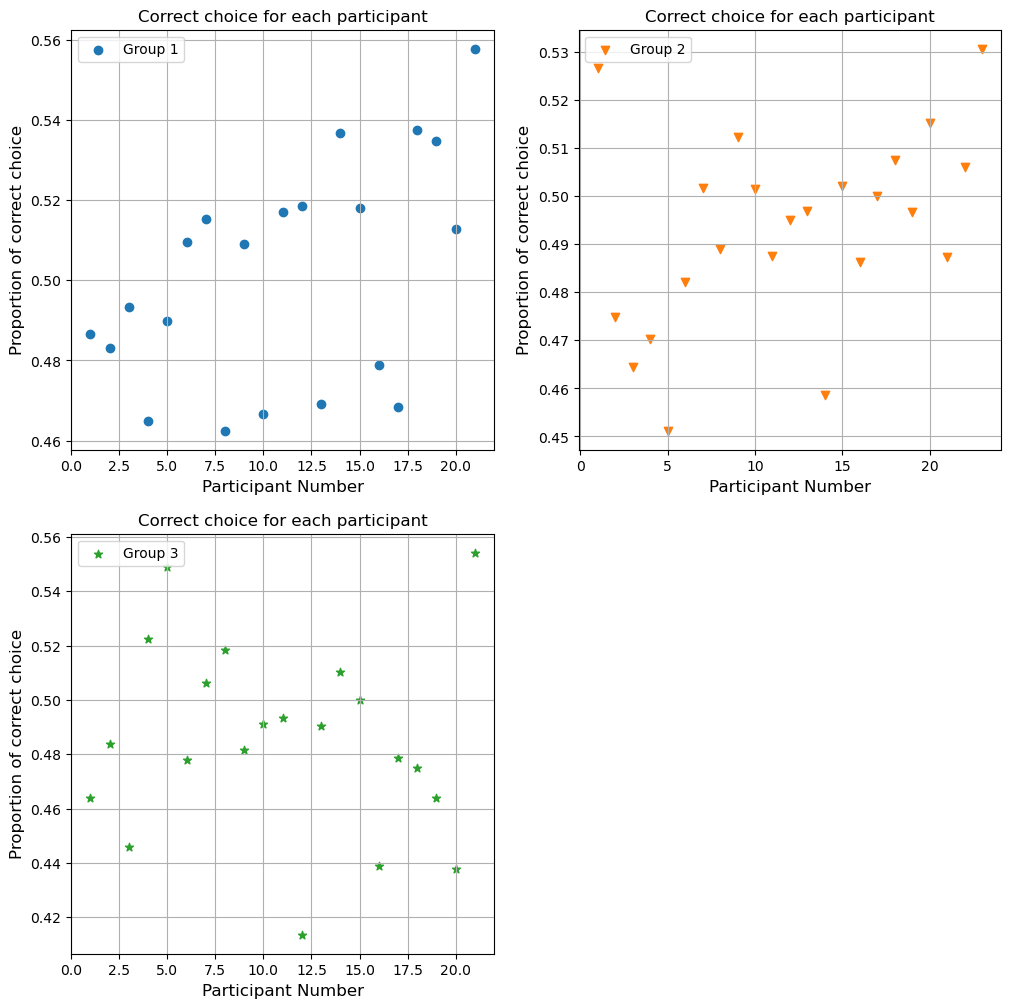

In [73]:
fig = plt.figure(figsize=(12, 12))
markers = ['o', 'v', '*']
groups = [1, 2, 3]
labels = [['Group 1'], ['Group 2'], ['Group 3']]
colors = [['#1f77b4'], ['#ff7f0e'], ['#2ca02c']]
for g, m, l, c in zip(groups, markers, labels, colors):
    fig.add_subplot(2, 2, g)
    x = np.linspace(1, len(dataAllMean.loc[dataAllMean['group']==str(g)]), 
                    num=len(dataAllMean.loc[dataAllMean['group']==str(g)])).astype(int)
    plt.scatter(x, dataAllMean.loc[dataAllMean['group']==str(g)]['correctChoice'] ,marker=m, c=c)
    plt.xlabel('Participant Number', size=12)
    plt.ylabel('Proportion of correct choice', size=12)
    plt.title('Correct choice for each participant', size=12)
    plt.grid()
    plt.legend(l)
plt.show()

In [74]:
""" Bar plots for proportion of correct choice and RT in each group"""


' Bar plots for proportion of correct choice and RT in each group'

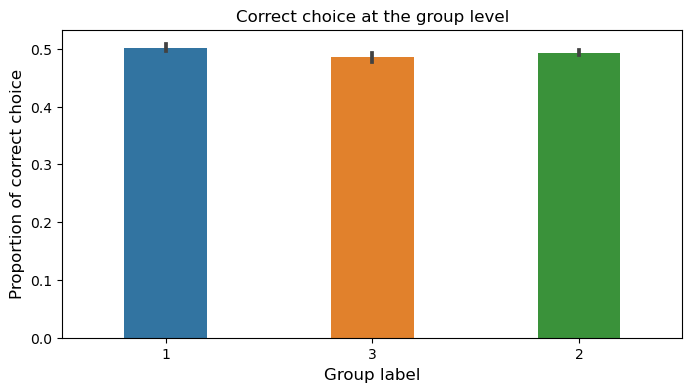

In [75]:
plt.figure(figsize=(8, 4))
sns.barplot(x='group',y='correctChoice', data=dataAllMean, errorbar='se', width=.4)
plt.xlabel('Group label', size=12)
plt.ylabel('Proportion of correct choice', size=12)
plt.title('Correct choice at the group level', size=12)
plt.show()

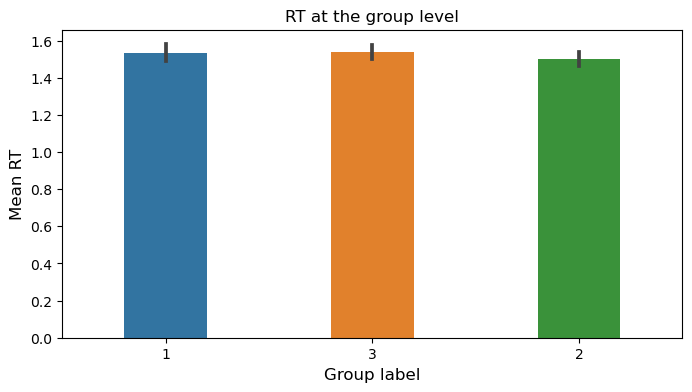

In [76]:
plt.figure(figsize=(8, 4))
sns.barplot(x='group',y='RT', data=dataAllMean, errorbar='se', width=.4)
plt.xlabel('Group label', size=12)
plt.ylabel('Mean RT', size=12)
plt.title('RT at the group level', size=12)
plt.show()

/tmp/ipykernel_3280225/4248873792.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllBlock = dataAll.groupby(['sub_ID', 'group', 'block'], as_index=False)['correctChoice', 'RT'].mean()


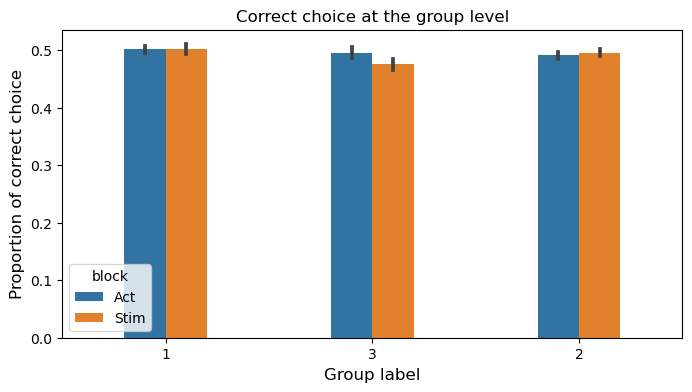

In [77]:
dataAllBlock = dataAll.groupby(['sub_ID', 'group', 'block'], as_index=False)['correctChoice', 'RT'].mean()

plt.figure(figsize=(8, 4))
markers = ['o', 'v', '*']
groups = ['1', '2', '3']
sns.barplot(x='group',y='correctChoice', data=dataAllBlock, hue='block', errorbar='se', width=.4)
plt.xlabel('Group label', size=12)
plt.ylabel('Proportion of correct choice', size=12)
plt.title('Correct choice at the group level', size=12)
plt.show()

/tmp/ipykernel_3280225/1453531013.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllBlockGroup2 = (dataAll.loc[dataAll['group']=='2']).groupby(['sub_ID', 'block', 'session'], as_index=False)['correctChoice', 'RT'].mean()


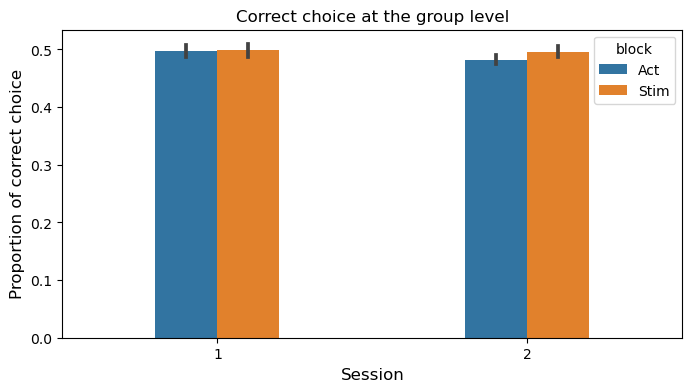

In [78]:
dataAllBlockGroup2 = (dataAll.loc[dataAll['group']=='2']).groupby(['sub_ID', 'block', 'session'], as_index=False)['correctChoice', 'RT'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x='session',y='correctChoice', data=dataAllBlockGroup2, hue='block', errorbar='se', width=.4)
plt.xlabel('Session', size=12)
plt.ylabel('Proportion of correct choice', size=12)
plt.title('Correct choice at the group level', size=12)
plt.show()

/tmp/ipykernel_3280225/2944649069.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllBlockGroup13 = (dataAll.loc[dataAll['group']!='2']).groupby(['sub_ID', 'block', 'group'], as_index=False)['correctChoice', 'RT'].mean()


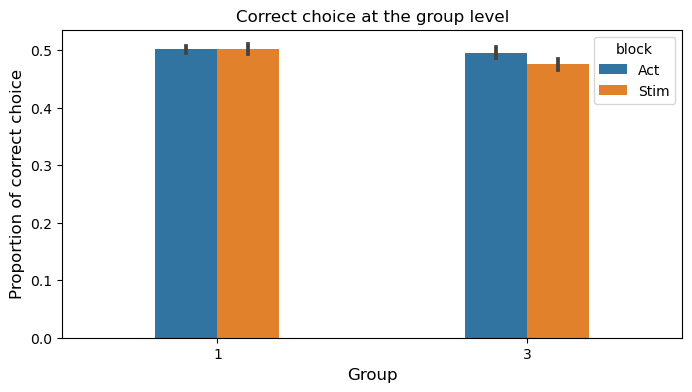

In [79]:
dataAllBlockGroup13 = (dataAll.loc[dataAll['group']!='2']).groupby(['sub_ID', 'block', 'group'], as_index=False)['correctChoice', 'RT'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x='group',y='correctChoice', data=dataAllBlockGroup13, hue='block', errorbar='se', width=.4)
plt.xlabel('Group', size=12)
plt.ylabel('Proportion of correct choice', size=12)
plt.title('Correct choice at the group level', size=12)
plt.show()

In [7]:
# Seperate simple repersal point with complex reversal point

In [15]:
if dataAllGroup2[0:1]['stimActFirst'][0]=='Act':
    


'Act'

In [25]:
dataAllGroup3 = dataAllGroup2.loc[((dataAllGroup2['session']==1) & (dataAllGroup2['run']==1) & (dataAllGroup2['block']=='Stim'))|
                              ((dataAllGroup2['session']==1) & (dataAllGroup2['run']==1) & (dataAllGroup2['block']=='Act'))|
                              ((dataAllGroup2['session']==2) & (dataAllGroup2['run']==1) & (dataAllGroup2['block']=='Act'))|
                              ((dataAllGroup2['session']==2) & (dataAllGroup2['run']==1) & (dataAllGroup2['block']=='Stim'))]

In [54]:
stats.binom_test(184, n=8*42, p=0.5, alternative='greater')

/tmp/ipykernel_3280225/253822401.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(184, n=8*42, p=0.5, alternative='greater')


0.04532585585896866

In [55]:
184/(8*42)

0.5476190476190477

In [ ]:

        
        if df[0:1]['stimActFirst'][0]=='Act':
            df = df.loc[((df['session']==1) & (df['run']==1) & (df['block']=='Act'))|
                        ((df['session']==1) & (df['run']==2) & (df['block']=='Stim'))|
                        ((df['session']==2) & (df['run']==1) & (df['block']=='Stim'))|
                        ((df['session']==2) & (df['run']==2) & (df['block']=='Act'))]
        elif df[0:1]['stimActFirst'][0]=='Stim':
            df = df.loc[((df['session']==1) & (df['run']==1) & (df['block']=='Stim'))|
                        ((df['session']==1) & (df['run']==2) & (df['block']=='Act'))|
                        ((df['session']==2) & (df['run']==1) & (df['block']=='Act'))|
                        ((df['session']==2) & (df['run']==2) & (df['block']=='Stim'))]

